In [1]:
import trainer
from utils import get_batch_classifier, slanted_triangular_learning_rate
import json
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('SentimentAnalysis/word2idx.json', 'r') as inp:
    word2idx = json.load(inp)
with open('SentimentAnalysis/char2idx.json', 'r') as inp:
    char2idx = json.load(inp)

In [3]:
VERSION = '102_sa'
params = dict(
    model_configs = {
      "rnn_layers":[
          {
             "units": 1024,
             "drop_i": 0.2,
             "wdrop": 0.4,
             "drop_o": 0.2
          },
          {
             "units": 1024,
             "wdrop": 0.4,
             "drop_o": 0.2
          },
          {
             "units": 1024,
             "drop_o": 0.2,
             "wdrop": 0.4
          }
],
       "vocab_size": len(word2idx) + 1,
       "drop_e": 0.0,
       "char_vocab_size": len(char2idx) + 1,
       "char_cnn_options": {
           "layers": [
                [1, 16],
                [2, 16],
                [3, 32],
                [4, 64],
                [5, 128],
                [6, 256],
                [7, 512]
           ],
           "n_highways": 2
       },
       "char_vec_size": 16,
       "projection_dims": 512,
       "skip_connection": True
    },
    optimizer = tf.train.AdamOptimizer,
    negative_samples = 10240,
    wdecay = 1.2e-6,
    alpha = 1e-6,
    beta = 1e-6,
    clip_norm = 0.3,
    clip_min = -100.0, clip_max = 100.0,
    bptt = 70,
    use_ema = False,
    save_freq = 50,
    log_path = '{}/logs'.format(VERSION),
    train_summary_dir = '{}/train_summary/'.format(VERSION),
    test_summary_dir = '{}/test_summary/'.format(VERSION),
    checkpoint_dir = '{}/checkpoints/'.format(VERSION)
)

my_trainer = trainer.Trainer(**params, fine_tune=True)

my_trainer.logger.info('Trainer params {}'.format(params))

tf.reset_default_graph()

Trainer params {'model_configs': {'rnn_layers': [{'units': 1024, 'drop_i': 0.2, 'wdrop': 0.4, 'drop_o': 0.2}, {'units': 1024, 'wdrop': 0.4, 'drop_o': 0.2}, {'units': 1024, 'drop_o': 0.2, 'wdrop': 0.4}], 'vocab_size': 153531, 'drop_e': 0.0, 'char_vocab_size': 1005, 'char_cnn_options': {'layers': [[1, 16], [2, 16], [3, 32], [4, 64], [5, 128], [6, 256], [7, 512]], 'n_highways': 2}, 'char_vec_size': 16, 'projection_dims': 512, 'skip_connection': True}, 'optimizer': <class 'tensorflow.python.training.adam.AdamOptimizer'>, 'negative_samples': 10240, 'wdecay': 1.2e-06, 'alpha': 1e-06, 'beta': 1e-06, 'clip_norm': 0.3, 'clip_min': -100.0, 'clip_max': 100.0, 'bptt': 70, 'use_ema': False, 'save_freq': 50, 'log_path': '102_sa/logs', 'train_summary_dir': '102_sa/train_summary/', 'test_summary_dir': '102_sa/test_summary/', 'checkpoint_dir': '102_sa/checkpoints/'}


In [4]:
classifier_configs = {
    'layers': [
        {'batch_norm': False, 'drop_out': 0.2},
        {'units': 50, 'batch_norm': False, 'drop_out': 0.1, 'activation': 'relu'}
    ], 'n_classes': 3
}
my_trainer.build_classifier(classifier_configs, folder_name='class_train_750')

/root/anaconda2/envs/tfp/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [5]:
my_trainer.restore_language_model('102_sa/checkpoints/test_sa/model.cpkt-5440')

INFO:tensorflow:Restoring parameters from 102_sa/checkpoints/test_sa/model.cpkt-5440


Restoring parameters from 102_sa/checkpoints/test_sa/model.cpkt-5440


In [6]:
train_chars = np.load('SentimentAnalysis/parts/class_750_train_char.npy')
train_chars = np.array([x[:300] for x in train_chars])
train_labels = np.load('SentimentAnalysis/parts/class_750_train_label.npy')
test_chars = np.load('SentimentAnalysis/class_test_char.npy')
test_labels = np.load('SentimentAnalysis/class_test_label.npy')

In [7]:
TRAIN_FOLDER = 'class_train_750'
TEST_FOLDER = 'class_test_750'
RATIO = 1/2.6
RATIO1 = RATIO/(1+RATIO)

In [8]:
log_lrs, losses = my_trainer.find_lr_classifier(train_chars, train_labels, 10, 48, [0, 50, 200], fine_tune_rate=[RATIO,0,0,0])

Batch    1,  lr 0.00000
Batch    2,  lr 0.00000
Batch    3,  lr 0.00000
Batch    4,  lr 0.00000
Batch    5,  lr 0.00000
Batch    6,  lr 0.00000
Batch    7,  lr 0.00000
Batch    8,  lr 0.00000
Batch    9,  lr 0.00000
Batch   10,  lr 0.00000
Batch   11,  lr 0.00000
Batch   12,  lr 0.00000
Batch   13,  lr 0.00000
Batch   14,  lr 0.00000
Batch   15,  lr 0.00000
Batch   16,  lr 0.00000
Batch   17,  lr 0.00000
Batch   18,  lr 0.00000
Batch   19,  lr 0.00000
Batch   20,  lr 0.00000
Batch   21,  lr 0.00000
Batch   22,  lr 0.00000
Batch   23,  lr 0.00000
Batch   24,  lr 0.00001
Batch   25,  lr 0.00001
Batch   26,  lr 0.00001
Batch   27,  lr 0.00001
Batch   28,  lr 0.00002
Batch   29,  lr 0.00002
Batch   30,  lr 0.00003
Batch   31,  lr 0.00004
Batch   32,  lr 0.00005
Batch   33,  lr 0.00007
Batch   34,  lr 0.00009
Batch   35,  lr 0.00012
Batch   36,  lr 0.00016
Batch   37,  lr 0.00021
Batch   38,  lr 0.00028
Batch   39,  lr 0.00036
Batch   40,  lr 0.00048
Batch   41,  lr 0.00063
Batch   42,  lr 

Restoring parameters from 102_sa/checkpoints/tmp/model.cpkt


update_title_pos
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/root/anaconda2/envs/tfp/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
update_title_pos
update_title_pos
update_title_pos
update_title_pos


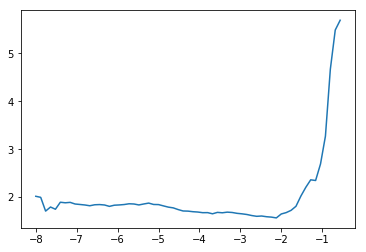

In [9]:
fig = plt.figure()
ax = plt.axes()
ax.plot(log_lrs, losses)

In [ ]:
# for _ in range(10):
#     my_trainer.train_step_classifier(train_chars, train_labels, 6, 3e-4, 20, [0, 50, 200], fine_tune_rate=[0, 0, 0, 0], folder_name=TRAIN_FOLDER)

In [ ]:
# for _ in range(10):
#     my_trainer.train_step_classifier(train_chars, train_labels, 10, 3e-4, 20, [0, 50, 200], fine_tune_rate=[RATIO, 0, 0, 0], folder_name=TRAIN_FOLDER)

In [ ]:
# for _ in range(10):
#     my_trainer.train_step_classifier(train_chars, train_labels, 10, 3e-4, 20, [0, 50, 200], fine_tune_rate=[RATIO, RATIO*RATIO, 0, 0], folder_name=TRAIN_FOLDER)

In [ ]:
# for _ in range(10):
#     my_trainer.train_step_classifier(train_chars, train_labels, 10, 3e-4, 20, [0, 50, 200], fine_tune_rate=[RATIO, RATIO*RATIO, RATIO*RATIO*RATIO, 0], folder_name=TRAIN_FOLDER)

In [ ]:
# for _ in range(10):
# my_trainer.train_step_classifier(train_chars, train_labels, 6, 3e-4, 20, [0, 50, 200], fine_tune_rate=[1/2.6, 1/2.6, 1/2.6, 1/2.6], folder_name='class_train_180')

In [10]:
NUM_EPOCH = 15
BATCH_SIZE = 10
TOTAL_ITER = NUM_EPOCH * len(train_labels)/BATCH_SIZE
LR_MAX = 5e-4
LR_RATIO = 32

In [11]:
lr = slanted_triangular_learning_rate(TOTAL_ITER, 1/NUM_EPOCH, LR_MAX, LR_RATIO)
for _ in range(NUM_EPOCH):
    my_trainer.train_step_classifier(train_chars, train_labels, BATCH_SIZE, lr, 48, [0, 50, 200], fine_tune_rate=[RATIO, RATIO1, RATIO1, RATIO], folder_name=TRAIN_FOLDER)
#     lr = max(lr * 0.4, 1e-5)

Step    1: loss: 3.86901, acc: 0.10000, bptt:  46, time 07.36
Step    2: loss: 3.08126, acc: 0.40000, bptt:  50, time 07.85
Step    3: loss: 2.34658, acc: 0.40000, bptt:  42, time 08.37
Step    4: loss: 1.33361, acc: 0.50000, bptt:  54, time 08.94
Step    5: loss: 1.50528, acc: 0.30000, bptt:  45, time 09.54
Step    6: loss: 0.99513, acc: 0.50000, bptt:  47, time 10.17
Step    7: loss: 1.33502, acc: 0.40000, bptt:  41, time 10.44
Step    8: loss: 1.21979, acc: 0.50000, bptt:  41, time 10.79
Step    9: loss: 1.59928, acc: 0.20000, bptt:  47, time 11.22
Step   10: loss: 1.54291, acc: 0.20000, bptt:  50, time 11.77
Step   11: loss: 1.76527, acc: 0.10000, bptt:  46, time 12.16
Step   12: loss: 1.94961, acc: 0.20000, bptt:  45, time 12.64
Step   13: loss: 1.23227, acc: 0.30000, bptt:  44, time 13.34
Step   14: loss: 1.27975, acc: 0.30000, bptt:  56, time 13.76
Step   15: loss: 1.62353, acc: 0.40000, bptt:  47, time 13.98
Step   16: loss: 1.08895, acc: 0.50000, bptt:  44, time 14.17
Step   1

Ignoring: 102_sa/checkpoints/tmp; No such file or directory
Step   76: loss: 0.74042, acc: 0.50000, bptt:  45, time 00.95
Step   77: loss: 0.92951, acc: 0.50000, bptt:  42, time 01.14
Step   78: loss: 0.67863, acc: 0.70000, bptt:  51, time 01.29
Step   79: loss: 0.53719, acc: 0.80000, bptt:  48, time 01.43
Step   80: loss: 0.61118, acc: 0.70000, bptt:  54, time 01.58
Step   81: loss: 0.50252, acc: 0.90000, bptt:  48, time 01.76
Step   82: loss: 0.47613, acc: 0.90000, bptt:  40, time 01.91
Step   83: loss: 0.46388, acc: 0.80000, bptt:  41, time 02.05
Step   84: loss: 0.85957, acc: 0.70000, bptt:  49, time 02.18
Step   85: loss: 0.81481, acc: 0.60000, bptt:  52, time 02.34
Step   86: loss: 0.20995, acc: 1.00000, bptt:  37, time 02.50
Step   87: loss: 0.92762, acc: 0.60000, bptt:  44, time 02.63
Step   88: loss: 0.40108, acc: 0.90000, bptt:  51, time 02.78
Step   89: loss: 0.83057, acc: 0.60000, bptt:  50, time 02.93
Step   90: loss: 0.47944, acc: 0.70000, bptt:  57, time 03.08
Step   91:

Step  208: loss: 0.93758, acc: 0.60000, bptt:  48, time 14.57
Step  209: loss: 1.14423, acc: 0.80000, bptt:  30, time 14.73
Step  210: loss: 0.42306, acc: 0.80000, bptt:  52, time 14.90
Step  211: loss: 0.20347, acc: 1.00000, bptt:  44, time 15.04
Step  212: loss: 0.30836, acc: 0.90000, bptt:  46, time 15.18
Step  213: loss: 1.64997, acc: 0.60000, bptt:  49, time 15.37
Step  214: loss: 0.36683, acc: 0.90000, bptt:  47, time 15.53
Step  215: loss: 2.21362, acc: 0.40000, bptt:  49, time 15.67
Step  216: loss: 0.88370, acc: 0.70000, bptt:  47, time 15.85
Step  217: loss: 0.89926, acc: 0.70000, bptt:  48, time 15.98
Step  218: loss: 0.21744, acc: 0.90000, bptt:  47, time 16.09
Step  219: loss: 0.30717, acc: 0.90000, bptt:  48, time 16.24
Step  220: loss: 1.10587, acc: 0.60000, bptt:  51, time 16.39
Step  221: loss: 1.25148, acc: 0.60000, bptt:  39, time 16.61
Step  222: loss: 0.53501, acc: 0.70000, bptt:  56, time 16.76
Step  223: loss: 0.69047, acc: 0.70000, bptt:  25, time 16.95
Step  22

Step  341: loss: 0.04090, acc: 1.00000, bptt:  46, time 10.77
Step  342: loss: 0.15913, acc: 0.90000, bptt:  42, time 10.92
Step  343: loss: 0.44966, acc: 0.90000, bptt:  50, time 11.08
Step  344: loss: 0.22508, acc: 0.90000, bptt:  50, time 11.23
Step  345: loss: 0.36878, acc: 0.70000, bptt:  54, time 11.39
Step  346: loss: 0.28923, acc: 0.80000, bptt:  45, time 11.57
Step  347: loss: 0.05064, acc: 1.00000, bptt:  44, time 11.75
Step  348: loss: 0.01727, acc: 1.00000, bptt:  44, time 11.93
Step  349: loss: 0.23442, acc: 0.90000, bptt:  50, time 12.09
Step  350: loss: 0.12811, acc: 0.90000, bptt:  43, time 12.24
Step  351: loss: 0.10973, acc: 0.90000, bptt:  42, time 14.09
Step  352: loss: 0.60669, acc: 0.90000, bptt:  29, time 14.27
Step  353: loss: 0.37660, acc: 0.80000, bptt:  32, time 14.43
Step  354: loss: 0.03360, acc: 1.00000, bptt:  42, time 14.56
Step  355: loss: 0.07987, acc: 1.00000, bptt:  45, time 14.71
Step  356: loss: 0.15545, acc: 0.90000, bptt:  51, time 14.88
Step  35

Step  474: loss: 0.01508, acc: 1.00000, bptt:  24, time 09.13
Step  475: loss: 0.00613, acc: 1.00000, bptt:  49, time 09.25
Step  476: loss: 0.00331, acc: 1.00000, bptt:  48, time 09.40
Step  477: loss: 0.00089, acc: 1.00000, bptt:  53, time 09.54
Step  478: loss: 0.09201, acc: 0.90000, bptt:  42, time 09.66
Step  479: loss: 0.00480, acc: 1.00000, bptt:  54, time 09.79
Step  480: loss: 0.00049, acc: 1.00000, bptt:  45, time 09.91
Step  481: loss: 0.00692, acc: 1.00000, bptt:  39, time 10.03
Step  482: loss: 0.00962, acc: 1.00000, bptt:  47, time 10.17
Step  483: loss: 0.31776, acc: 0.90000, bptt:  56, time 10.31
Step  484: loss: 0.01417, acc: 1.00000, bptt:  53, time 10.48
Step  485: loss: 0.00086, acc: 1.00000, bptt:  49, time 10.63
Step  486: loss: 0.01936, acc: 1.00000, bptt:  45, time 10.81
Step  487: loss: 0.00415, acc: 1.00000, bptt:  52, time 10.97
Step  488: loss: 0.29536, acc: 0.70000, bptt:  16, time 11.16
Step  489: loss: 0.02050, acc: 1.00000, bptt:  43, time 11.34
Step  49

Step  607: loss: 0.04218, acc: 1.00000, bptt:  48, time 02.98
Step  608: loss: 0.00163, acc: 1.00000, bptt:  42, time 03.61
Step  609: loss: 0.01731, acc: 1.00000, bptt:  47, time 04.07
Step  610: loss: 0.01016, acc: 1.00000, bptt:  54, time 04.60
Step  611: loss: 0.30867, acc: 0.80000, bptt:  49, time 04.99
Step  612: loss: 0.24873, acc: 0.90000, bptt:  42, time 05.45
Step  613: loss: 0.16451, acc: 0.90000, bptt:  54, time 05.84
Step  614: loss: 0.01061, acc: 1.00000, bptt:  55, time 06.28
Step  615: loss: 0.00550, acc: 1.00000, bptt:  47, time 06.43
Step  616: loss: 0.00880, acc: 1.00000, bptt:  49, time 06.57
Step  617: loss: 0.00003, acc: 1.00000, bptt:  50, time 06.69
Step  618: loss: 0.00001, acc: 1.00000, bptt:  51, time 06.82
Step  619: loss: 0.47843, acc: 0.90000, bptt:  50, time 06.98
Step  620: loss: 0.41366, acc: 0.90000, bptt:  45, time 07.16
Step  621: loss: 0.00046, acc: 1.00000, bptt:  49, time 07.30
Step  622: loss: 0.00033, acc: 1.00000, bptt:  44, time 07.42
Step  62

Step  740: loss: 0.00022, acc: 1.00000, bptt:  52, time 16.58
Step  741: loss: 0.00022, acc: 1.00000, bptt:  46, time 16.74
Step  742: loss: 0.00001, acc: 1.00000, bptt:  46, time 16.87
Step  743: loss: 0.00002, acc: 1.00000, bptt:  36, time 17.00
Step  744: loss: 0.00001, acc: 1.00000, bptt:  25, time 17.18
Step  745: loss: 0.00010, acc: 1.00000, bptt:  54, time 17.34
Step  746: loss: 0.00036, acc: 1.00000, bptt:  45, time 17.49
Step  747: loss: 0.00182, acc: 1.00000, bptt:  46, time 17.64
Step  748: loss: 0.00533, acc: 1.00000, bptt:  38, time 17.82
Step  749: loss: 0.00022, acc: 1.00000, bptt:  44, time 17.98
Step  750: loss: 0.00091, acc: 1.00000, bptt:  34, time 18.96
Step  751: loss: 0.00064, acc: 1.00000, bptt:  45, time 00.21
Step  752: loss: 0.00001, acc: 1.00000, bptt:  47, time 00.35
Step  753: loss: 0.00144, acc: 1.00000, bptt:  35, time 00.48
Step  754: loss: 0.00265, acc: 1.00000, bptt:  49, time 00.65
Step  755: loss: 0.00077, acc: 1.00000, bptt:  25, time 00.81
Step  75

Step  873: loss: 0.00007, acc: 1.00000, bptt:  53, time 14.64
Step  874: loss: 0.34901, acc: 0.90000, bptt:  49, time 14.79
Step  875: loss: 0.00000, acc: 1.00000, bptt:  46, time 14.92
Step  876: loss: 0.00000, acc: 1.00000, bptt:  40, time 15.09
Step  877: loss: 0.00000, acc: 1.00000, bptt:  55, time 15.24
Step  878: loss: 0.00005, acc: 1.00000, bptt:  57, time 15.41
Step  879: loss: 0.00017, acc: 1.00000, bptt:  50, time 15.55
Step  880: loss: 0.00001, acc: 1.00000, bptt:  49, time 15.69
Step  881: loss: 0.00000, acc: 1.00000, bptt:  43, time 15.83
Step  882: loss: 0.00023, acc: 1.00000, bptt:  51, time 15.99
Step  883: loss: 0.00005, acc: 1.00000, bptt:  38, time 16.16
Step  884: loss: 0.00002, acc: 1.00000, bptt:  45, time 16.34
Step  885: loss: 0.02717, acc: 1.00000, bptt:  45, time 16.52
Step  886: loss: 0.00238, acc: 1.00000, bptt:  50, time 16.67
Step  887: loss: 0.00049, acc: 1.00000, bptt:  47, time 16.82
Step  888: loss: 0.00000, acc: 1.00000, bptt:  41, time 16.95
Step  88

Step 1006: loss: 0.01554, acc: 1.00000, bptt:  48, time 12.32
Step 1007: loss: 0.01083, acc: 1.00000, bptt:  46, time 12.48
Step 1008: loss: 0.00002, acc: 1.00000, bptt:  46, time 12.63
Step 1009: loss: 0.00000, acc: 1.00000, bptt:  54, time 12.78
Step 1010: loss: 0.00000, acc: 1.00000, bptt:  44, time 12.89
Step 1011: loss: 0.00000, acc: 1.00000, bptt:  21, time 13.09
Step 1012: loss: 0.00000, acc: 1.00000, bptt:  38, time 13.26
Step 1013: loss: 0.00002, acc: 1.00000, bptt:  55, time 13.37
Step 1014: loss: 0.00000, acc: 1.00000, bptt:  48, time 13.50
Step 1015: loss: 0.00000, acc: 1.00000, bptt:  51, time 13.67
Step 1016: loss: 0.00001, acc: 1.00000, bptt:  48, time 13.81
Step 1017: loss: 0.00001, acc: 1.00000, bptt:  51, time 13.96
Step 1018: loss: 0.00008, acc: 1.00000, bptt:  48, time 14.08
Step 1019: loss: 0.00001, acc: 1.00000, bptt:  42, time 14.21
Step 1020: loss: 0.00050, acc: 1.00000, bptt:  45, time 14.33
Step 1021: loss: 0.00000, acc: 1.00000, bptt:  27, time 14.49
Step 102

In [ ]:
for _ in range(10):
    my_trainer.train_step_classifier(train_chars, train_labels, 12, lr, 20, [0, 50, 200], fine_tune_rate=[1.0, 1.0, 1.0, 1.0], folder_name=TRAIN_FOLDER)
    lr = max(lr * 0.4, 1e-5)

In [12]:
from sklearn.metrics import classification_report

In [13]:
def eval_step_classifier(self, test_char, test_labels, batch_size, bptt, splits, folder_name='class_test'):
    import time
    import os
    start_time = time.time()
    save_path = os.path.join(self.checkpoint_dir, folder_name, 'model.cpkt')
    self.test_saver.save(self.session, save_path, global_step=self.session.run(self.global_step))
    total_loss = 0
    total_acc = 0
    count = 0
    predicts = []
    y_true = []
    for char_inputs, seq_lens, char_lens, true_labels in get_batch_classifier(test_char, test_labels, batch_size, splits, is_training=False):
        fd = {
            self.model_test.inputs: char_inputs, self.model_test.seq_lens: seq_lens,
            self.model_test.char_lens: char_lens, self.model_test.bptt: bptt,
            self.true_y: true_labels
        }
        y_pred, test_loss, test_acc = self.session.run([self.test_classifier.logits, self.test_loss, self.test_acc], feed_dict=fd)
        total_loss += test_loss * len(true_labels)
        total_acc += test_acc * len(true_labels)
        count += len(true_labels)
        predicts.append(y_pred)
        y_true.append(true_labels)
        print("Evaluate total loss: {:05.5f}, total acc: {:05.5f}, time {:05.2f}".format(total_loss/count, total_acc/count, time.time()-start_time))
    print(count)
    print(total_acc)
    return np.argmax(np.concatenate(predicts), axis=-1), np.concatenate(y_true)

In [14]:
y_pred, y_true = eval_step_classifier(my_trainer, test_chars, test_labels, 5, 20, [0, 50, 200], TEST_FOLDER)

Evaluate total loss: 5.77852, total acc: 0.60000, time 03.04
Evaluate total loss: 7.30058, total acc: 0.40000, time 03.18
Evaluate total loss: 7.76003, total acc: 0.40000, time 03.29
Evaluate total loss: 7.08254, total acc: 0.45000, time 03.46
Evaluate total loss: 5.88890, total acc: 0.48000, time 03.66
Evaluate total loss: 5.28192, total acc: 0.50000, time 03.76
Evaluate total loss: 4.83512, total acc: 0.51429, time 03.88
Evaluate total loss: 4.30760, total acc: 0.55000, time 03.98
Evaluate total loss: 3.95618, total acc: 0.55556, time 04.07
Evaluate total loss: 3.56070, total acc: 0.60000, time 04.17
Evaluate total loss: 3.51316, total acc: 0.60000, time 04.27
Evaluate total loss: 3.67459, total acc: 0.61667, time 04.40
Evaluate total loss: 3.91279, total acc: 0.60000, time 04.50
Evaluate total loss: 4.07508, total acc: 0.58571, time 04.65
Evaluate total loss: 3.99944, total acc: 0.57333, time 04.76
Evaluate total loss: 4.06312, total acc: 0.57500, time 04.86
Evaluate total loss: 4.2

Evaluate total loss: 3.60592, total acc: 0.61439, time 11.45
Evaluate total loss: 3.61329, total acc: 0.61286, time 11.49
Evaluate total loss: 3.67831, total acc: 0.60993, time 11.54
Evaluate total loss: 3.67664, total acc: 0.60845, time 11.59
Evaluate total loss: 3.70732, total acc: 0.60699, time 11.64
Evaluate total loss: 3.76010, total acc: 0.60556, time 11.69
Evaluate total loss: 3.74866, total acc: 0.60690, time 11.73
Evaluate total loss: 3.79270, total acc: 0.60411, time 11.77
Evaluate total loss: 3.77136, total acc: 0.60544, time 11.82
Evaluate total loss: 3.74601, total acc: 0.60811, time 11.86
Evaluate total loss: 3.77639, total acc: 0.60671, time 11.90
Evaluate total loss: 3.77557, total acc: 0.60533, time 11.95
Evaluate total loss: 3.77002, total acc: 0.60530, time 11.96
Evaluate total loss: 3.77139, total acc: 0.60526, time 11.99
Evaluate total loss: 3.74677, total acc: 0.60784, time 12.04
Evaluate total loss: 3.74979, total acc: 0.60779, time 12.06
Evaluate total loss: 3.7

In [15]:
print(classification_report(y_true=y_true, y_pred=y_pred, target_names=['negative', 'neutral', 'positive']))

              precision    recall  f1-score   support

    negative       0.58      0.57      0.58       350
     neutral       0.60      0.61      0.60       350
    positive       0.68      0.67      0.67       350

   micro avg       0.62      0.62      0.62      1050
   macro avg       0.62      0.62      0.62      1050
weighted avg       0.62      0.62      0.62      1050



In [ ]:
print(classification_report(y_true=y_true, y_pred=y_pred, target_names=['negative', 'neutral', 'positive']))